In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import model

In [2]:
#Fix the random seed
np.random.seed(42)

## Load the training data and label

In [3]:
train_data = np.loadtxt('./data/Features.csv',delimiter=',',dtype="int")
train_label= np.loadtxt('./data/Labels.csv',delimiter=',',dtype="int")

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))

shape of train_data: (11500, 4096)
shape of train_label: (11500,)
shape of test_data: (1500, 4096)


## Show the training data

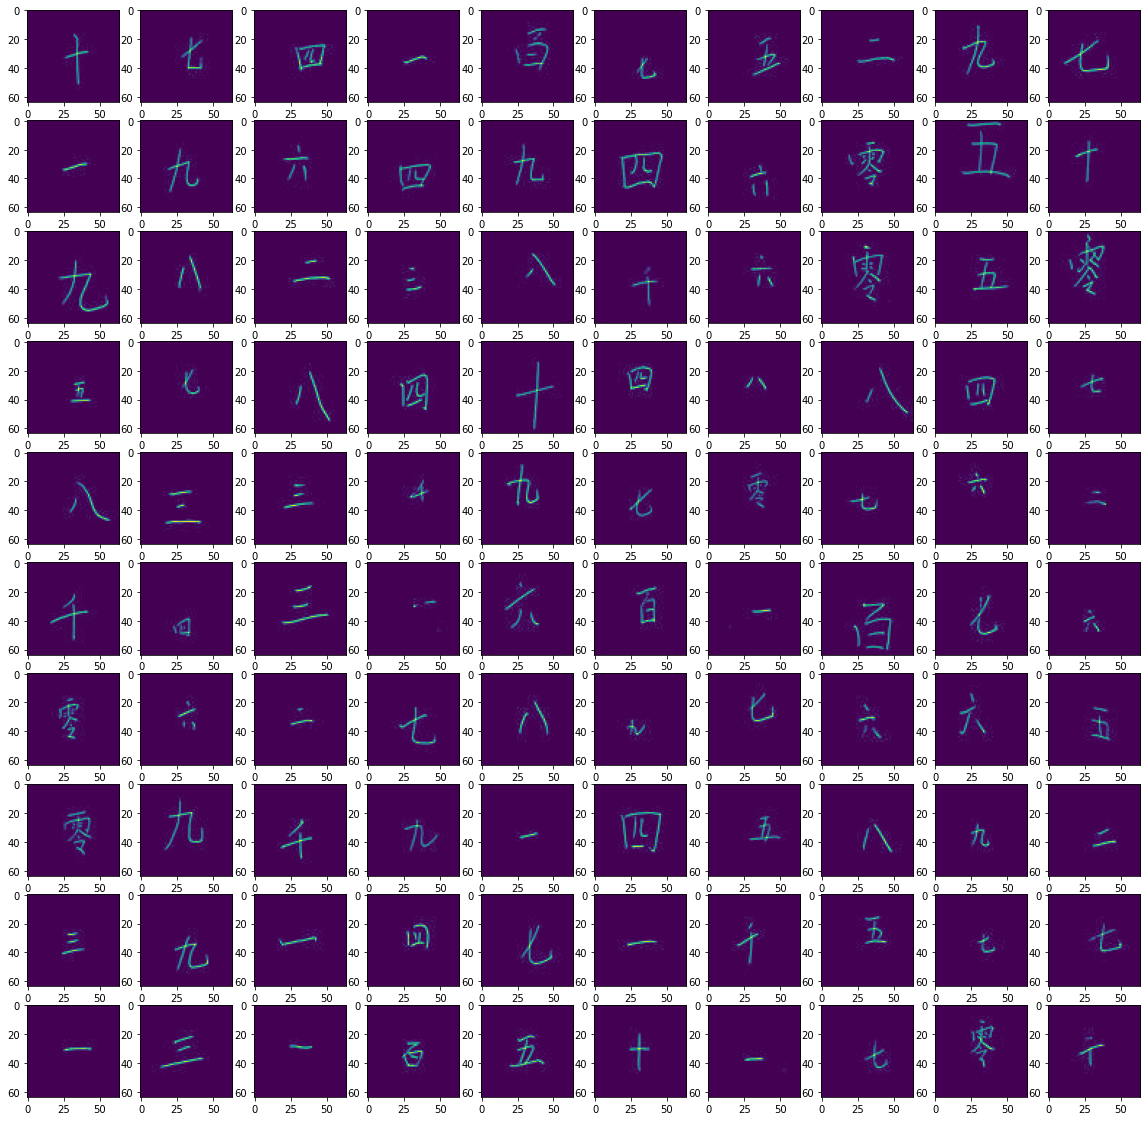

In [4]:
plt.figure(figsize=(20, 20))
for index in range(100):
    image = train_data[index].reshape(64,64)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

In [5]:
train_image_num = train_data.shape[0]

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))


print("train_image_num  is : {}".format(train_image_num))

shape of train_data: (11500, 4096)
shape of train_label: (11500,)
shape of test_data: (1500, 4096)
train_image_num  is : 11500
test_image_num   is : 1500


In [6]:
val_image_num = 1500

## Convert the training labels to one hot vector

In [7]:
label_temp = np.zeros((train_image_num, 13), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
print("One-hot training labels shape:",train_label_onehot.shape)





One-hot training labels shape: (11500, 13)


## Hyperparameters

In [16]:
EPOCH = 30
Batch_size = 32
Learning_rate = 0.001

## Training with SGD, without bias, learning rate scheduler

learning rate initialize with 0.001. Through each epoch, learning rate plus 0.001, it is to say I try learning rate value from 0.001 to 0.03 to find out the region whose loss function value descends the most rapidly.

In [17]:
net1 = model.Network()

train_batch_num = (train_image_num  -  val_image_num)//Batch_size
val_batch_num = (val_image_num)//Batch_size

net1_train_loss = []
net1_val_loss = []

for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred, train_loss = net1.forward(train_data[it*Batch_size:(it+1)*Batch_size].T, train_label_onehot[it*Batch_size:(it+1)*Batch_size].T)
        pred_index = np.argmax(pred, axis=0)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net1.backward(train_data[it*Batch_size:(it+1)*Batch_size].T)
        net1.update(Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt
        pred, val_loss = net1.forward(train_data[tit*Batch_size:(tit+1)*Batch_size].T, train_label_onehot[tit*Batch_size:(tit+1)*Batch_size].T)
        pred_index = np.argmax(pred, axis=0)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
    
    net1_train_loss.append(total_train_loss/train_batch_num)
    net1_val_loss.append(total_val_loss/val_batch_num)
    Learning_rate += 0.001
    print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
          , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))

Epoch:  1 |Train Loss:  2.5639 |Train Acc:8.6700 |Val Loss:  2.5630 |Val Acc:8.1333
Epoch:  2 |Train Loss:  2.5584 |Train Acc:8.9500 |Val Loss:  2.5521 |Val Acc:8.0667
Epoch:  3 |Train Loss:  2.5276 |Train Acc:7.6100 |Val Loss:  2.4937 |Val Acc:7.6667
Epoch:  4 |Train Loss:  2.3955 |Train Acc:11.6200 |Val Loss:  2.2639 |Val Acc:20.6000
Epoch:  5 |Train Loss:  1.9649 |Train Acc:33.0500 |Val Loss:  1.7054 |Val Acc:42.8000
Epoch:  6 |Train Loss:  1.4419 |Train Acc:51.2000 |Val Loss:  1.2109 |Val Acc:57.5333
Epoch:  7 |Train Loss:  0.9780 |Train Acc:66.2700 |Val Loss:  0.9183 |Val Acc:66.8667
Epoch:  8 |Train Loss:  0.6682 |Train Acc:76.6400 |Val Loss:  0.7970 |Val Acc:71.6000
Epoch:  9 |Train Loss:  0.4369 |Train Acc:85.5600 |Val Loss:  0.7410 |Val Acc:75.2000
Epoch: 10 |Train Loss:  0.3163 |Train Acc:89.9500 |Val Loss:  0.7083 |Val Acc:76.2667
Epoch: 11 |Train Loss:  0.2199 |Train Acc:92.6700 |Val Loss:  0.9005 |Val Acc:73.3333
Epoch: 12 |Train Loss:  0.1938 |Train Acc:93.5800 |Val Loss:

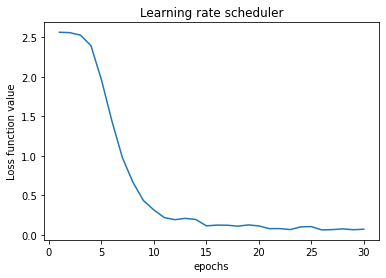

In [18]:
plt.figure(1)
plt.plot(range(1,EPOCH+1), net1_train_loss)
plt.title('Learning rate scheduler')
plt.ylabel('Loss function value')
plt.xlabel('epochs')
plt.show()

## Training with SGD, without bias, lr = 0.008

In [19]:
Learning_rate = 0.008
EPOCH = 40
Batch_size = 32

In [20]:
net1 = model.Network()

train_batch_num = (train_image_num  -  val_image_num)//Batch_size
val_batch_num = (val_image_num)//Batch_size

net1_train_loss = []
net1_val_loss = []
net1_train_acc = []
net1_val_acc = []

for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred, train_loss = net1.forward(train_data[it*Batch_size:(it+1)*Batch_size].T, train_label_onehot[it*Batch_size:(it+1)*Batch_size].T)
        pred_index = np.argmax(pred, axis=0)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net1.backward(train_data[it*Batch_size:(it+1)*Batch_size].T)
        net1.update(Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt
        pred, val_loss = net1.forward(train_data[tit*Batch_size:(tit+1)*Batch_size].T, train_label_onehot[tit*Batch_size:(tit+1)*Batch_size].T)
        pred_index = np.argmax(pred, axis=0)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
    
    net1_train_loss.append(total_train_loss/train_batch_num)
    net1_val_loss.append(total_val_loss/val_batch_num)
    net1_train_acc.append(train_hit/(train_image_num-val_image_num)*100.0)
    net1_val_acc.append(val_hit/val_image_num*100.0)
    if (epoch%5==0):
        print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
              , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))

Epoch:  5 |Train Loss:  0.5026 |Train Acc:83.1500 |Val Loss:  0.8079 |Val Acc:70.6667
Epoch: 10 |Train Loss:  0.1242 |Train Acc:97.3200 |Val Loss:  0.6659 |Val Acc:80.0667
Epoch: 15 |Train Loss:  0.0032 |Train Acc:99.8300 |Val Loss:  0.7122 |Val Acc:81.6667
Epoch: 20 |Train Loss:  0.0011 |Train Acc:99.8400 |Val Loss:  0.7383 |Val Acc:82.0000
Epoch: 25 |Train Loss:  0.0007 |Train Acc:99.8400 |Val Loss:  0.7595 |Val Acc:81.9333
Epoch: 30 |Train Loss:  0.0005 |Train Acc:99.8400 |Val Loss:  0.7764 |Val Acc:82.0000
Epoch: 35 |Train Loss:  0.0004 |Train Acc:99.8400 |Val Loss:  0.7907 |Val Acc:82.0667
Epoch: 40 |Train Loss:  0.0003 |Train Acc:99.8400 |Val Loss:  0.8030 |Val Acc:81.9333


## Training with SGD and adding bias 0.1, lr = 0.008

In [21]:
net2 = model.Network(bias=True)

train_batch_num = (train_image_num  -  val_image_num)//Batch_size
val_batch_num = (val_image_num)//Batch_size

net2_train_loss = []
net2_val_loss = []
net2_train_acc = []
net2_val_acc = []

for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred, train_loss = net2.forward(train_data[it*Batch_size:(it+1)*Batch_size].T, train_label_onehot[it*Batch_size:(it+1)*Batch_size].T)
        pred_index = np.argmax(pred, axis=0)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net2.backward(train_data[it*Batch_size:(it+1)*Batch_size].T)
        net2.update(Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt
        pred, val_loss = net2.forward(train_data[tit*Batch_size:(tit+1)*Batch_size].T, train_label_onehot[tit*Batch_size:(tit+1)*Batch_size].T)
        pred_index = np.argmax(pred, axis=0)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
    
    net2_train_loss.append(total_train_loss/train_batch_num)
    net2_val_loss.append(total_val_loss/val_batch_num)
    net2_train_acc.append(train_hit/(train_image_num-val_image_num)*100.0)
    net2_val_acc.append(val_hit/val_image_num*100.0)
    if (epoch%5==0):
        print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
              , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))

Epoch:  5 |Train Loss:  0.4410 |Train Acc:84.8600 |Val Loss:  0.7870 |Val Acc:72.1333
Epoch: 10 |Train Loss:  0.0296 |Train Acc:99.2900 |Val Loss:  0.6823 |Val Acc:81.4000
Epoch: 15 |Train Loss:  0.0131 |Train Acc:99.6800 |Val Loss:  0.7167 |Val Acc:82.1333
Epoch: 20 |Train Loss:  0.0025 |Train Acc:99.8300 |Val Loss:  0.7514 |Val Acc:82.4000
Epoch: 25 |Train Loss:  0.0008 |Train Acc:99.8400 |Val Loss:  0.7973 |Val Acc:82.2000
Epoch: 30 |Train Loss:  0.0005 |Train Acc:99.8400 |Val Loss:  0.8205 |Val Acc:82.2000
Epoch: 35 |Train Loss:  0.0004 |Train Acc:99.8400 |Val Loss:  0.8376 |Val Acc:82.1333
Epoch: 40 |Train Loss:  0.0003 |Train Acc:99.8400 |Val Loss:  0.8511 |Val Acc:82.0000


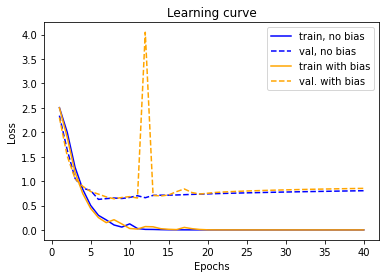

In [22]:
plt.figure(2)
plt.plot(range(1,EPOCH+1), net1_train_loss, linestyle='-', color='blue', label='train, no bias')
plt.plot(range(1,EPOCH+1), net1_val_loss, linestyle='--', color='blue', label='val, no bias')
plt.plot(range(1,EPOCH+1), net2_train_loss, linestyle='-', color='orange', label='train with bias')
plt.plot(range(1,EPOCH+1), net2_val_loss, linestyle='--', color='orange', label='val. with bias')
plt.title('Learning curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

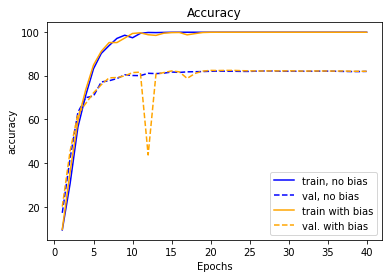

In [23]:
plt.figure(3)
plt.plot(range(1,EPOCH+1), net1_train_acc, linestyle='-', color='blue', label='train, no bias')
plt.plot(range(1,EPOCH+1), net1_val_acc, linestyle='--', color='blue', label='val, no bias')
plt.plot(range(1,EPOCH+1), net2_train_acc, linestyle='-', color='orange', label='train with bias')
plt.plot(range(1,EPOCH+1), net2_val_acc, linestyle='--', color='orange', label='val. with bias')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()